In [78]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
test = x_train[4]

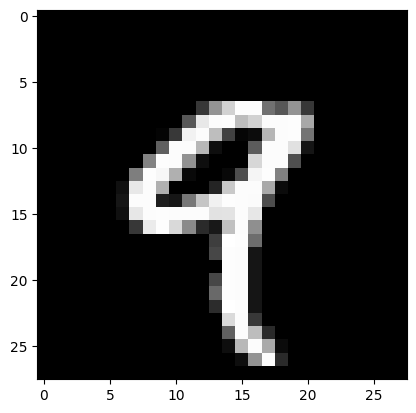

In [58]:
plt.imshow(test,cmap='gray')

In [59]:
x_train.max()

255

In [60]:
x_train.min()

0

In [61]:
X_train = x_train/255.0

In [62]:
X_test = x_test/255.0

In [63]:
X_train.max(),X_train.min()

(1.0, 0.0)

In [64]:
X_test.max(),X_test.min()

(1.0, 0.0)

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
y_train[0]

5

In [15]:
from tensorflow.keras import utils

In [16]:
y_train = utils.to_categorical(y_train, 10)
y_test_scaled = utils.to_categorical(y_test, 10)

In [17]:
y_train.shape

(60000, 10)

In [18]:
img = X_train[23]

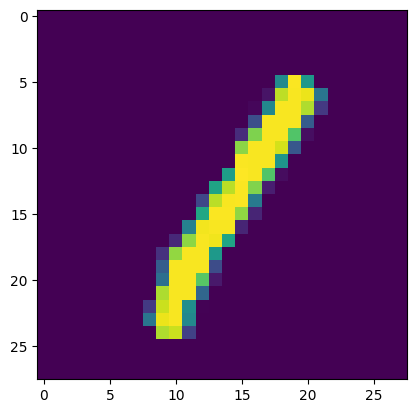

In [19]:
plt.imshow(img)

In [20]:

X_train = X_train.reshape(-1,28,28,1)
X_test  = X_test.reshape(-1,28,28,1)

In [21]:
type(y_train)

numpy.ndarray

In [22]:
X_train.shape

(60000, 28, 28, 1)

# NAME : ALDRIN LIJO J E
 # REG NO: 212222240007

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,activation="relu"))
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation="softmax"))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 16)               

In [30]:
model.compile('adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3410 - accuracy: 0.8940 - val_loss: 0.1254 - val_accuracy: 0.9602
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1117 - accuracy: 0.9663 - val_loss: 0.0882 - val_accuracy: 0.9729
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0848 - accuracy: 0.9736 - val_loss: 0.0709 - val_accuracy: 0.9781
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0626 - val_accuracy: 0.9815
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0555 - val_accuracy: 0.9839
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0450 - val_accuracy

In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.341011,0.893983,0.125448,0.9602
1,0.111682,0.966250,0.088227,0.9729
2,0.084838,0.973633,0.070858,0.9781
3,0.070465,0.978633,0.074349,0.9767
4,0.060643,0.981500,0.062645,0.9815


<Axes: >

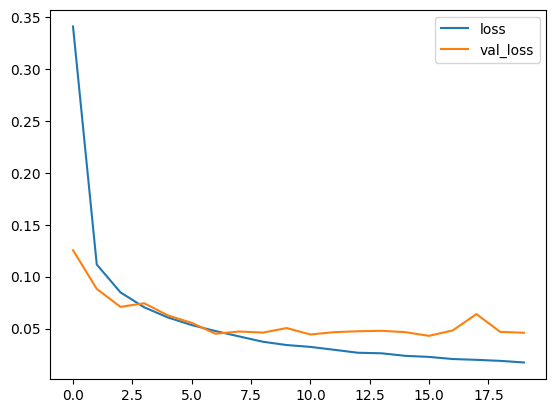

In [36]:
metrics[['loss','val_loss']].plot()

<Axes: >

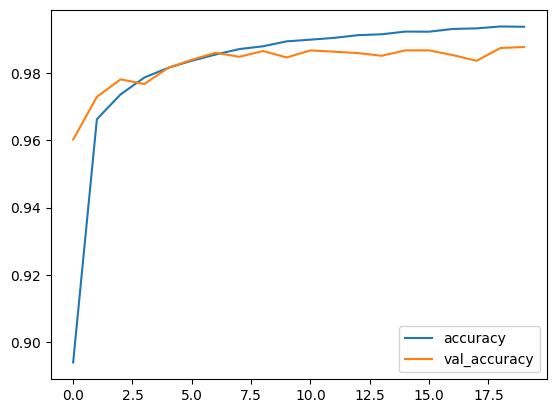

In [45]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [52]:
pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [53]:
y_test[0:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [50]:
print(type(y_test))
print(type(pred))
y_test = y_test.ravel()
pred=pred.ravel()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [67]:
print(confusion_matrix(y_test,pred))

[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1132    0    1    0    0    0    2    0    0]
 [   1    1 1016    4    1    0    2    7    0    0]
 [   0    0    0 1001    0    5    0    1    2    1]
 [   1    0    1    0  969    0    1    1    0    9]
 [   0    0    0    6    0  882    3    0    1    0]
 [   5    1    0    0    2    3  946    0    1    0]
 [   0    3    3    3    0    0    0 1014    1    4]
 [   2    0    7    2    3    2    0    2  953    3]
 [   2    1    1    0   10    3    0    3    2  987]]


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# PREDICTION


In [79]:
 img = image.load_img('/content/7.jpg')

In [80]:
type(img)

PIL.Image.Image

In [81]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [82]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 223ms/step


In [83]:
print(x_single_prediction)


[7]


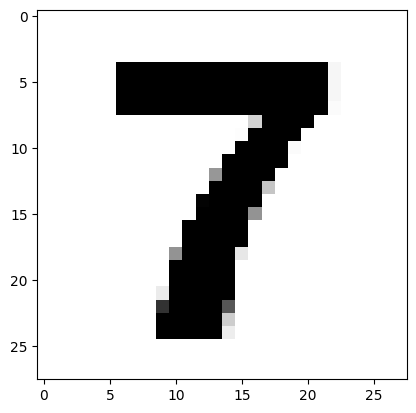

In [84]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [90]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [91]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 18ms/step


In [93]:
print(x_single_prediction)

[8]


In [95]:
print("ALDRIN LIJO")
print("REG NO:212222240007")

ALDRIN LIJO
REG NO:212222240007
